O objetivo desse Jupyter é servir como um guia para mais pessoas que querem aprender como modelar os dados e analisar seguindo o Python, passarmos de análises superficiais para modelos preditivos e Machine Learning e a partir disso tirarmos alguns insights interessantes.

Vamos iniciar importando a biblioteca Pandas para que possamos tratar os dados.

In [1]:
import pandas as pd

Agora podemos visualizar o dataset utilizando o Pandas.
Esse dataset foi disponibilizado no repositório do github.

In [2]:
df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xlsx')

Visualizando as 5 primeiras linhas do dataset:

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Verificando agora o número de linhas e colunas do dataset:

In [4]:
df.shape

(30000, 25)

Já sabemos que  dataset contém 30.000 linhas e 25 colunas, agora iniciaremos uma melhor exploração dos dados, verificando o nome das colunas.

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

De acordo com o nome das colunas, podemos identificar a coluna ID, que serve (ou deveria servir) como chave única de identificação para cada cliente, com o código a seguir podemos olhar detalhadamente a coluna ID e fazer uma contagem das chaves únicas.

In [6]:
df['ID'].nunique()

29687

Ou seja, identificamos que em um dataset de 30.000 linhas, temos um número menor de ID's únicos, o que nos mostra que alguns deles estão duplicando.

Podemos fazer uma contagem desses ID's e agrupando em uma variável definida como id_counts de forma a identificar quais estão aparecendo mais de uma vez.

In [7]:
id_counts = df['ID'].value_counts()
id_counts.head()

3d832783-1571    2
feac3745-a2be    2
f20d8a3d-d047    2
cfa9d026-de0d    2
2ba2d987-103e    2
Name: ID, dtype: int64

Com o comando executado acima .head() nós conseguimos visualizar por padrão os 5 primeiros casos de ID's duplicados, agora iremos verificr e agrupar o número de entradas duplicadas de nosso dataset.

In [8]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

Com essa checagem conseguimos verificar que a maioria dos ID's aparecem apenas uma única vez, enquanto que 313 deles aparecem duas vezes, nenhum apareceu mais de duas vezes.

Faremos a importação do numpy agora para continuarmos com a verificação e validação dos dados.

In [9]:
import numpy as np

Com numpy já carregado nós queremos agora apenas os ID's duplicados, que iremos agrupar em uma variável denominada dupe_mask

In [10]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

3d832783-1571    True
feac3745-a2be    True
f20d8a3d-d047    True
cfa9d026-de0d    True
2ba2d987-103e    True
Name: ID, dtype: bool

Essa variável é a máscara lógica criada para armazenar valores booleanos (True/False) - no caso como escolhemos id_counts == 2 
então ela deve nos retornar apenas valores True.

Verificando os dados de outra forma:

In [11]:
id_counts.index[0:5]

Index(['3d832783-1571', 'feac3745-a2be', 'f20d8a3d-d047', 'cfa9d026-de0d',
       '2ba2d987-103e'],
      dtype='object')

Iremos selecionar e armazenar os ID's duplicados em uma nova variável chamada dupe_ids
Depois iremos converter em uma lista e exibir seu tamanho.

In [12]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

Verificando as 5 primeiras entradas - você pode alterar o número dentro do parênteses para exibir quantas entradas lhe for mais conveniente.

In [13]:
dupe_ids[0:5]

['3d832783-1571',
 'feac3745-a2be',
 'f20d8a3d-d047',
 'cfa9d026-de0d',
 '2ba2d987-103e']

Usaremos o método .isin e .loc nas três primeiras entradas de nossas duplicadas, com isso iremos criar uma máscara booleana dos argumentos de todas as colunas, estaremos basicamente filtrando as três primeiras duplicadas do dataset e aplicando um método que nos permite visualizar se há algo de errado visualmente nos dados carregados.

In [14]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
12424,feac3745-a2be,220000,1,3,2,30,0,0,-1,-1,...,5036,8269,3681,1066,4723,5051,8293,3692,3087,0
12524,feac3745-a2be,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24627,3d832783-1571,20000,1,2,2,32,2,0,0,0,...,20515,20424,19996,1325,1339,1609,823,723,1705,0
24727,3d832783-1571,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27419,f20d8a3d-d047,50000,1,1,1,45,-1,-1,-1,-1,...,390,390,390,390,390,390,390,390,390,1
27519,f20d8a3d-d047,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Facilmente conseguimos observar que durante a extração dos dados via SQL, ocorreu uma duplicação de alguns ID's e um deles tem uma linha somente com dados zerados.

Acredito que todos chegamos a mesma conclusão de que precisamos eliminar os dados que contém linhas zeradas, excetuando-se a coluna com ID, dessa forma eliminaremos o problema de duplicação.

Se criarmos uma matriz booleana do mesmo tamanho do DataFrame utilizando a condição == 0 poderemos agrupar esses ID's zerados.

In [15]:
df_zero_mask =df == 0

Vamos utilizar novamente o .loc para criarmos a máscara booleana e retornar o True, ou seja, os valores zerados a partir da segunda coluna, que são os dados que nos interessam.

In [16]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [17]:
sum(feature_zero_mask)

315

Vamos limpar o DataFrame agora excluindo as linhas que contém apenas zeros.

In [18]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

Na verdade, criamos um novo DataFrame com o código anterior, df_clean_1, nele, nós excluimos tudo que era diferente de zero usando o operador lógico not, ~,e a resposta : para selecionar todas as colunas.

Verificando o shape desse novo DataFrame.

In [19]:
df_clean_1.shape

(29685, 25)

Agora constatando quantos desses ID's são únicos.

In [20]:
df_clean_1['ID'].nunique()

29685

Primeira etapa de verificação dos dados antes de iniciarmos nossa análise preditiva está concluída, conseguimos limpar com sucesso nosso DataFrame e temos agora apenas valores exclusivos nos ID's.

# EXPLORANDO E LIMPANDO OS DADOS

Após a primeira limpeza de dados, vamos agora checar os tipos de dados que compõem nosso dataset utilizando o info()

In [21]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

Vemos que das 25 colunas, temos duas que não estão com os dados classificados como integer, são elas ID, que já vimos, e Pay_1, que vamos olhar agora mais detalhamenta.

In [22]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

Os dados da coluna PAY_1 são mostrados a direita, vemos que temos dados documentados como 0, que não estão documentatos no dicionário dos dados.

Vamos prosseguir com uma contagem de valores da coluna PAY_1 para verificar os dados com maiores detalhes.

In [23]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

Conseguimos agora verificar o porquê desses dados estarem constando como objetc ao invés de int64, temos além de dados 0 e -2, uma string marcada como "Not available", ou seja, precisaremos lidar com esse fato mais tarde, há diversas formas de lidarmos com essa questão, nesse momento vamos eliminá-los de nosso dataset, esse assunto será retomado posteriormente com uma diferente abordagem.

Vamos criar uma máscara lógica com os dados de PAY_1 descartando os dados ausentes, utilizaremos o operador != (que significa "diferente de" em Python)

In [24]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [25]:
sum(valid_pay_1_mask)

26664

Limpando o dataset comos valores missing.

In [26]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()

In [27]:
df_clean_2.shape

(26664, 25)

Com o dataset já devidamente dimensionado, podemos verificar novamente se temos algum valor ausente.

In [28]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

Mudando o formato dos dados da coluna de object para int64

In [29]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [30]:
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


#EXPLORAÇÃO E GARANTIA DA QUALIDADE DOS DADOS

Exercício 6: Explorand o limite de crédito e as características demográficas.

Vamos importar o matplotlib e com isso podemos analisar melhor algumas colunas plotando gráficos para checar as informações.

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

Verificando os primeiros gráficos em formato de histogramas:

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

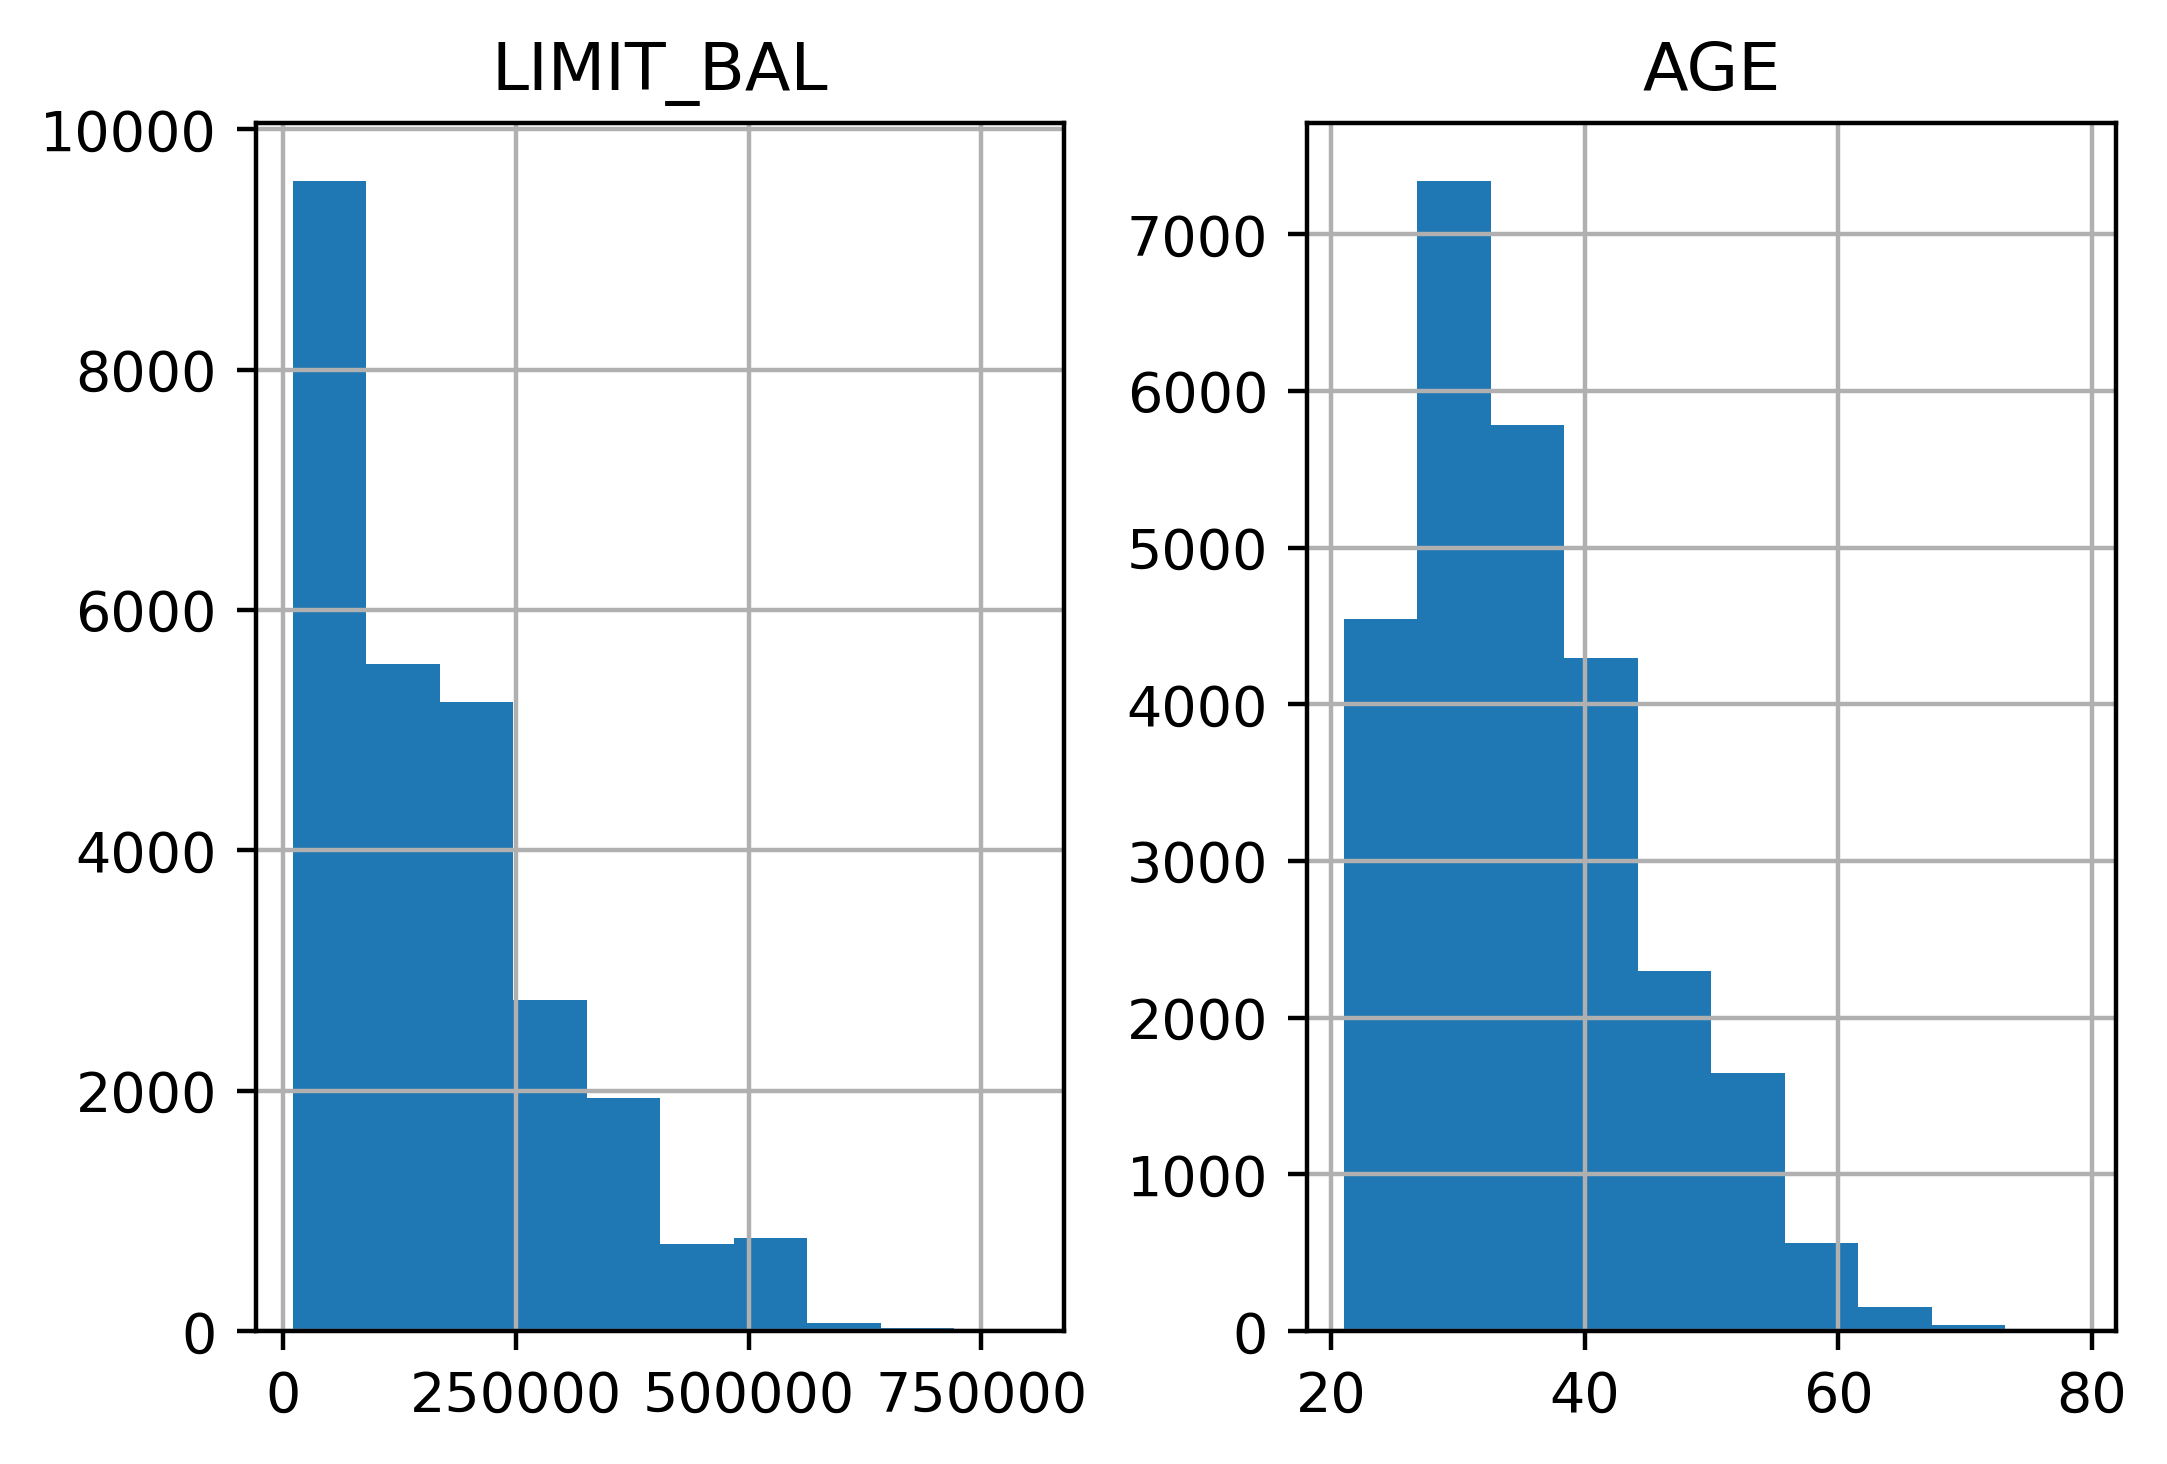

In [33]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

Podemos com esses primeiros gráficos ver a distribuição da idade e de limite de crédito.
Vamos agora fazer uma função que nos permita visualizar algumas informações estatísticas.

In [34]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [35]:
# Verificando agora a contagem de valores da característica EDUCATION:

df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

De acordo com os dados obtidos, e seguindo as premissas do livro, as categorias EDUCATION: 0, 5 e 6 não estão documentadas, por isso é importante separar esses resultados e agrupá-los na categoria 4 - 'Outros'.

Vamos fazer isso a seguir:

In [36]:
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [37]:
# Checando agora a contagem da categoria MARRIAGE

df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

Ocorre aqui o mesmo problema que ocorreu na categoria EDUCATION, o valor 0 não está documentado, com isso iremos agrupá-lo com 3 - 'Outros'.

In [38]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level: ordinal encoding')

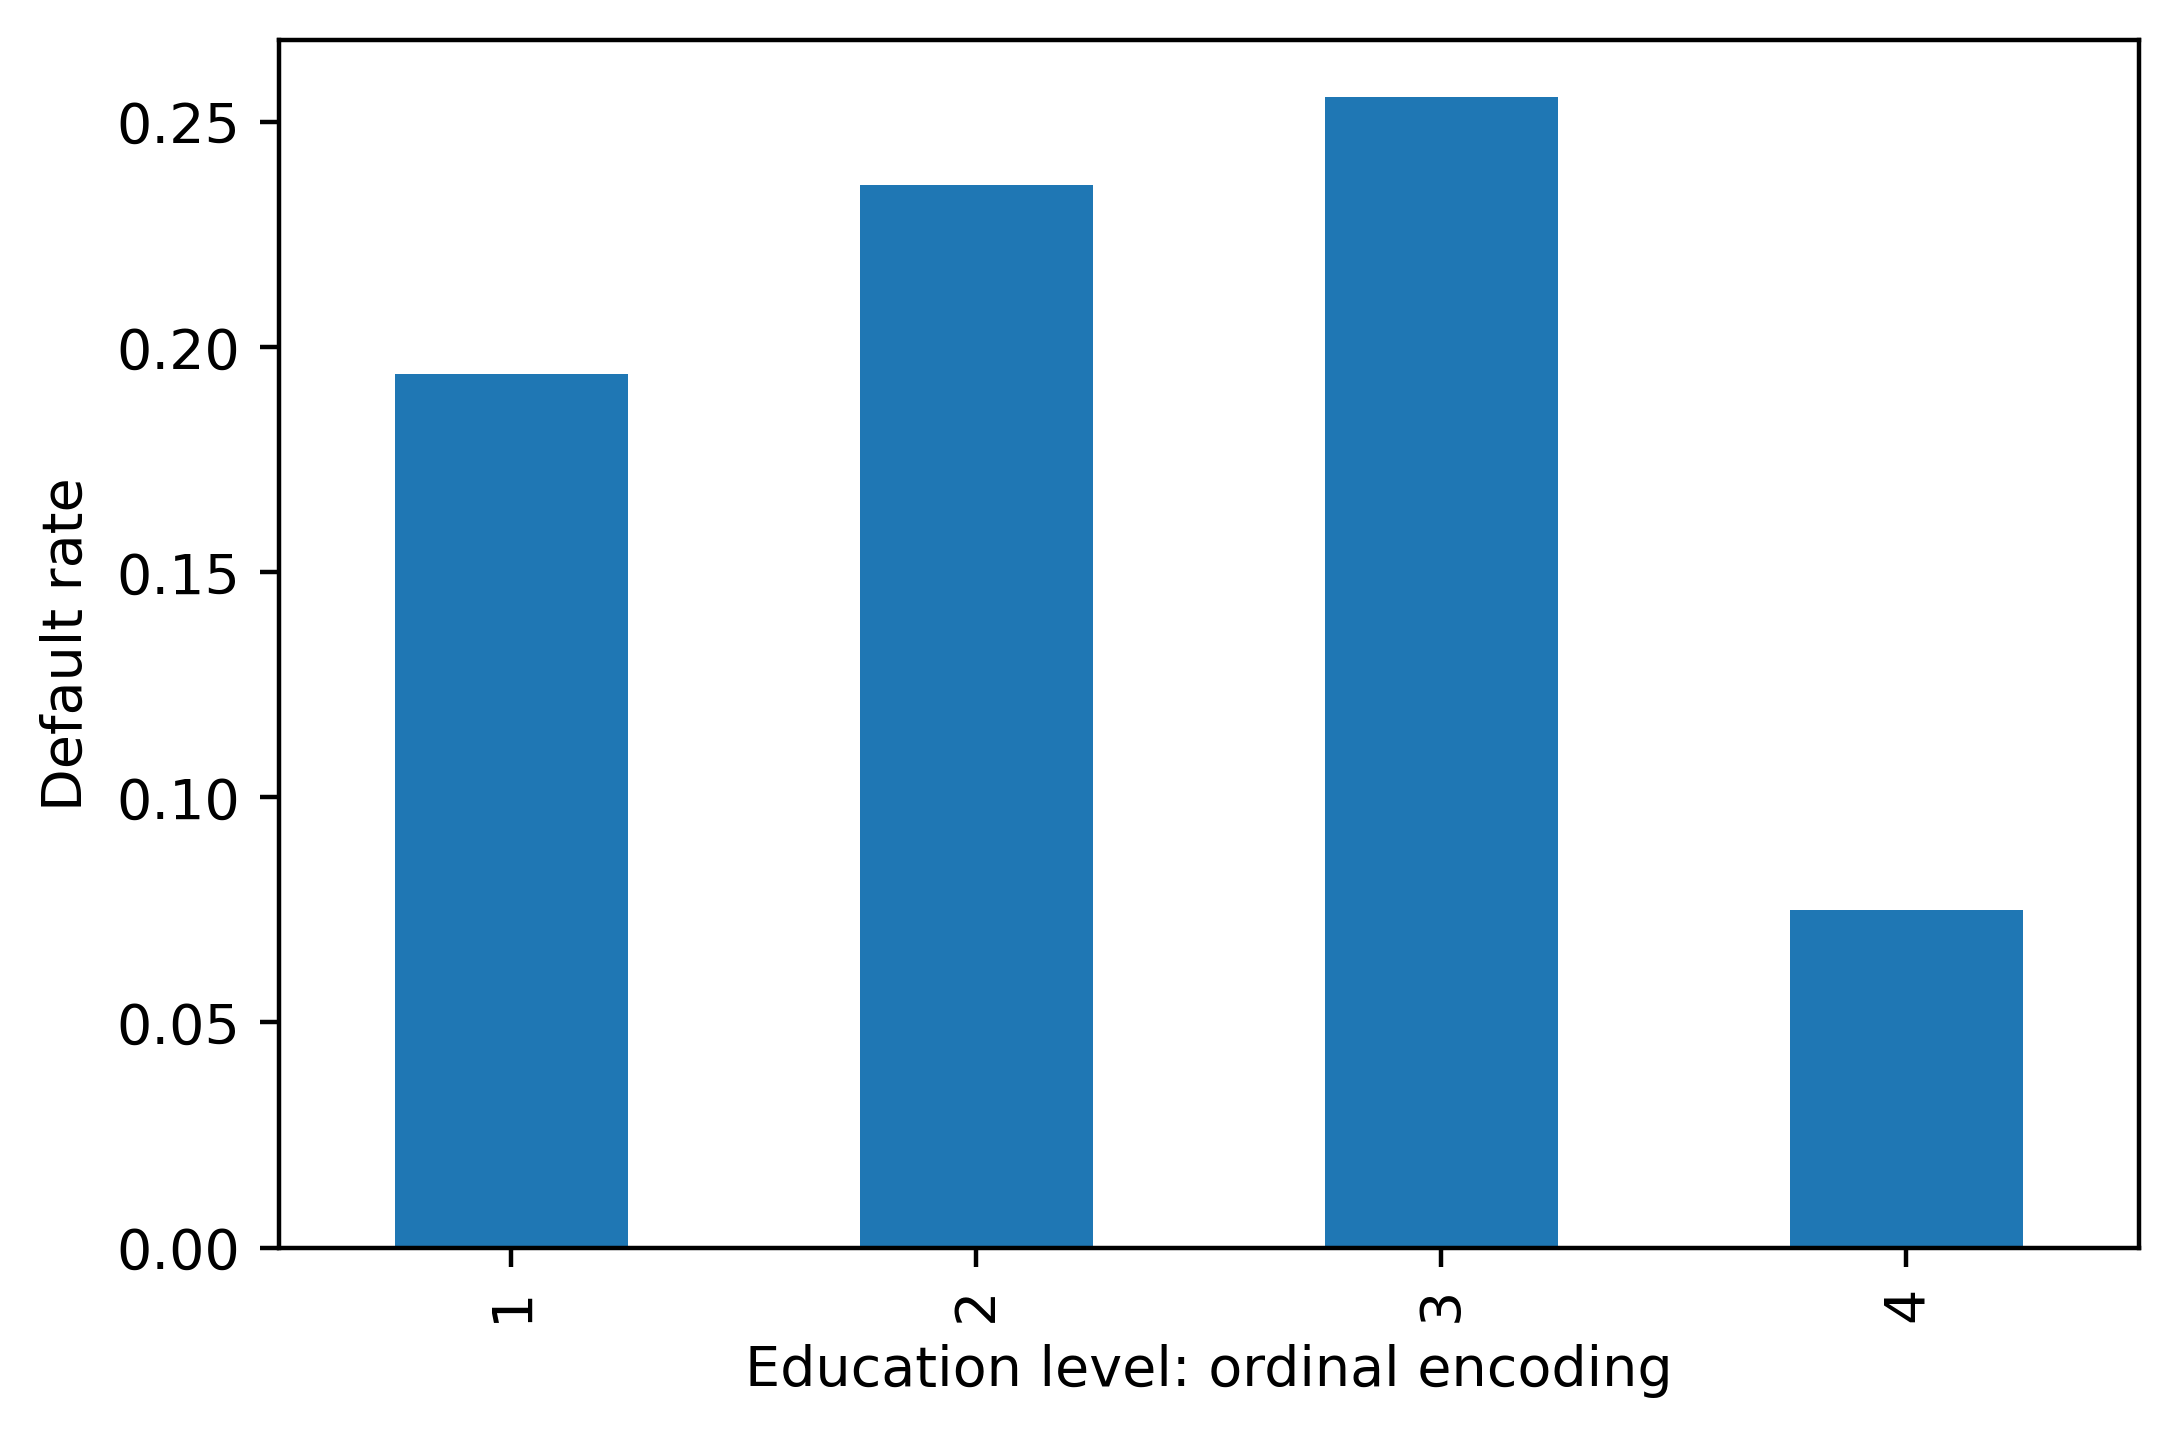

In [40]:
# Checando agora um agrupamento da taxa de inadimplência pelo nível educacional.

df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')